0 10.0
100 2.26328
200 1.19227
300 1.01966
400 0.991835
500 0.987351
600 0.986628
700 0.986511
800 0.986493
900 0.98649
learning parameters array([ 1.30275416, -0.22242002], dtype=float32), acuracy 1.000000


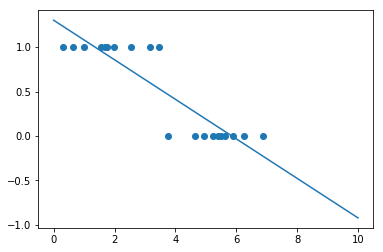

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1) 

plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable([0., 0.], name = "parametrs")

def model(X, w):
    return tf.add(tf.multiply(w[1], X),w[0]) # y = w1 * x + w0

y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, current_cost = sess.run([train_op, cost], feed_dict = {X:xs, Y:labels})
        if epoch % 100 == 0:
            print(epoch, current_cost)
            
    correct_prediction = tf.equal(Y, tf.cast(tf.greater(y_model, 0.5), tf.float32))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    w_val, accuracy_val = sess.run([w, accuracy], feed_dict = {X:xs, Y:labels})              
    print("learning parameters %a, acuracy %f" % (w_val, accuracy_val))
    
all_xs = np.linspace(0, 10, 100)    
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()
    
    